/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best hyperparameters: {'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15}
Accuracy: 0.8709285714285714
Precision: 0.8692380252533413
Recall: 0.8690771320032766
F1 score: 0.8690589380330754
Confusion matrix:
 [[1259    2   15    4    5   14   23    2   14    5]
 [   1 1527    6   14   11    8    9    4   16    4]
 [  28   28 1158   31   19    8   20   23   42   23]
 [   7   11   46 1203   10   53   12   17   45   29]
 [  11    3   15   14 1120   13   13   11   23   72]
 [  27   20   18   74   12 1038   25    5   31   23]
 [  24   10   16    7   16   26 1260    4   26    7]
 [   4   10   27   24   17    5    1 1361   19   35]
 [  11   23   50   59   30   30   24    8 1085   37]
 [  10    9   20   28   70   26    7   39   29 1182]]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.166242 to fit



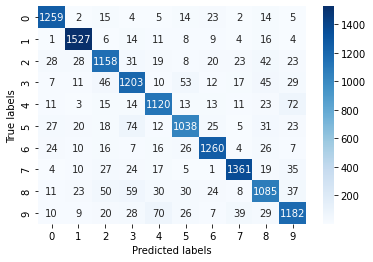

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Apply grid search
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Apply parameter search
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Train the decision tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**random_search.best_params_, random_state=42)
dt.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt.predict(X_test)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()